In [1]:
import os
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier, XGBRegressor
directory = 'C:/r_d/' # Папка з файлом
file_name = 'data_with_race.csv'

In [2]:
data = pd.read_csv(directory + file_name)
print(data) # Огляд дати

       gender   race  physics  biology  history  language2  geography  \
0           0  White   622.60   491.56   439.93     707.64     663.65   
1           1  White   538.00   490.58   406.59     529.05     532.28   
2           1  White   455.18   440.00   570.86     417.54     453.53   
3           0  White   756.91   679.62   531.28     583.63     534.42   
4           1  White   584.54   649.84   637.43     609.06     670.46   
...       ...    ...      ...      ...      ...        ...        ...   
43298       1  White   519.55   622.20   660.90     543.48     643.05   
43299       1  White   816.39   851.95   732.39     621.63     810.68   
43300       0  White   798.75   817.58   731.98     648.42     751.30   
43301       0  White   527.66   443.82   545.88     624.18     420.25   
43302       0  White   512.56   415.41   517.36     532.37     592.30   

       literatury  portugese    math  chemistry      gpa  
0          557.09     711.37  731.31     509.80  1.33333  
1    

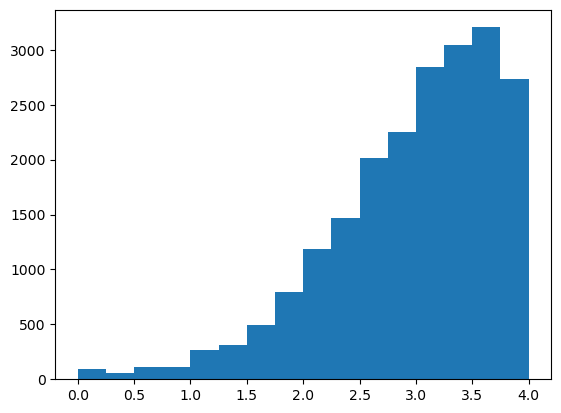

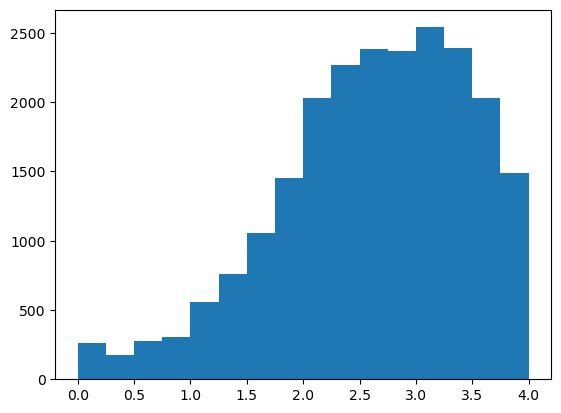

In [3]:
# Гістограми залежності оцінок від статі
plt.hist(data[data["gender"] == 0]["gpa"], bins = 16)
plt.show()
plt.hist(data[data["gender"] == 1]["gpa"], bins = 16)
plt.show()

In [4]:
# Підготовка дати
keys = [
    "gender",
    "gpa",
    "race",
    "physics",
    "biology",
    "history",
    "language2",
    "geography",
    "literatury",
    "portugese",
    "math",
    "chemistry"
]
def string_to_number(str) :
    if str == 'Asian' : return 0
    if str == 'White' : return 1
    if str == 'Indigenous' : return 2
    if str == 'Black' : return 3
    if str == 'Parda' : return 4
data["race"] = [string_to_number(s) for s in data["race"]]

In [5]:
# Машинне навчання
X = np.array([data[key] for key in keys[2:]]).T
Ya = np.array([data[keys[0]]]).T
Yy = np.array([data[keys[1]]]).T

X_train, X_test, A_train, A_test = train_test_split(X, Ya, test_size=0.33, random_state=41)
Ma = XGBRegressor(n_estimators = 50, max_depth = 3, random_state = 13)
Ma.fit(X_train, A_train)

X_train, X_test, Y_train, Y_test = train_test_split(X, Yy, test_size=0.33, random_state=41)
My = XGBRegressor(n_estimators = 50, max_depth = 3, random_state = 13)
My.fit(X_train, Y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=50, n_jobs=None,
             num_parallel_tree=None, random_state=13, ...)

In [13]:
# Робимо передбачення
dA = A_test[:, 0] - Ma.predict(X_test)
dY = Y_test[:, 0] - My.predict(X_test)

In [7]:
p_deltas = np.polyfit(dA, dY, 1)
Beta = p_deltas[0]
predicted_dY = dA * Beta
var0 = ((dY - dY.mean()) ** 2).sum()
var1 = ((dY - predicted_dY) ** 2).sum()
r2 = 1 - var1 / var0
print("Beta :", Beta, "r2 :", r2)

Beta : -0.32942497543920424 r2 : 0.03876898325638545


# Beta ~= -0.33
Тобто у чоловіків будуть менші оцінки на 0.33

Шанс маленький, але непоганий, як я зрозумів.

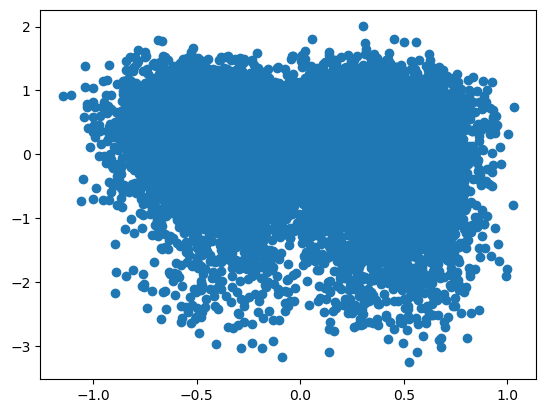

In [8]:
# Показ дати
plt.scatter(dA, dY)

# Звіт
Задача - Знайти відносний причинний вплив статі студента на її/його оцінку після вступу.

Перехід робив за допомогою масиву keys, з назвами єлементів data.

Фільтрацію спеціально не робив - бо це оцінки, тут не має бути винятків для цієї задачі :)

Для машинного навчання взяв звичайну модель, яка була на лекції.

# Знахідки
Я перевіряв зв'язки між предметами. Шукав лінії з малою шириною.

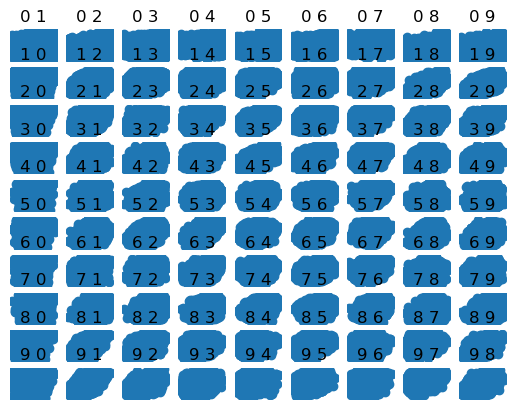

In [9]:
# Всі зв'язки
count = 1
keys2 = [
    "gpa",
    "physics",
    "biology",
    "history",
    "language2",
    "geography",
    "literatury",
    "portugese",
    "math",
    "chemistry"
]
for i in range(0, 10) :
    for j in range(0, 10) :
        if i != j :
            plt.subplot(10, 9, count)
            plt.title(str(i) + ' ' + str(j))
            plt.scatter(data[keys2[i]], data[keys2[j]])
            plt.axis("off")
            count += 1

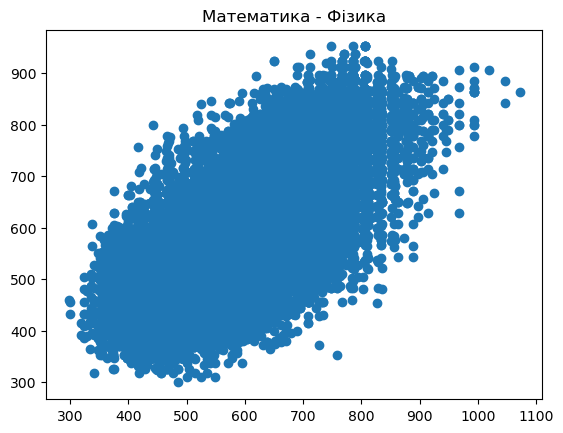

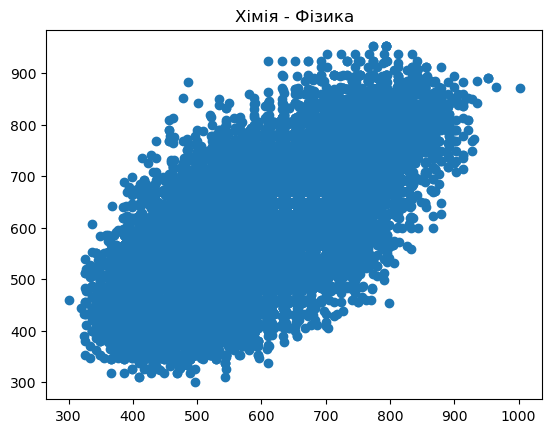

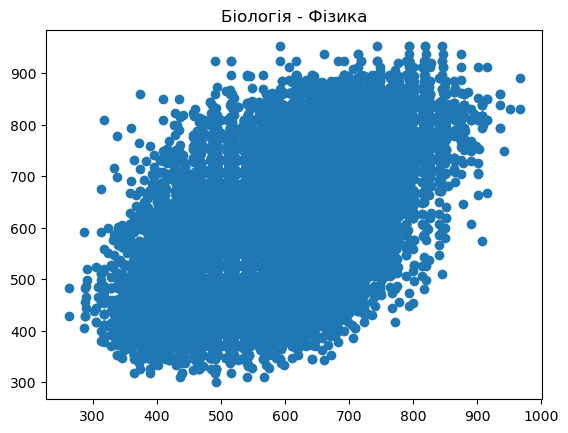

In [10]:
# Фізика має лінійний зв'язок до Математики та Хімії. Але також до біології!
plt.title("Математика - Фізика")
plt.scatter(data[keys2[8]], data[keys2[1]])
plt.show()
plt.title("Хімія - Фізика")
plt.scatter(data[keys2[9]], data[keys2[1]])
plt.show()
plt.title("Біологія - Фізика")
plt.scatter(data[keys2[2]], data[keys2[1]])
plt.show()

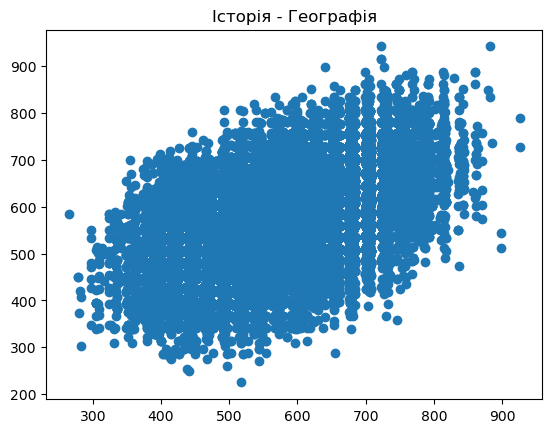

In [11]:
# Історія має зв'язок до Географії

plt.title("Історія - Географія")
plt.scatter(data[keys2[3]], data[keys2[5]])
plt.show()

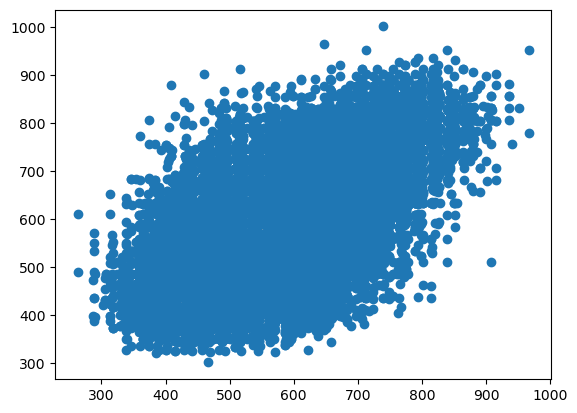

In [12]:
# Також є зв'язок між Біологією та Хімією
plt.scatter(data[keys2[2]], data[keys2[9]])